# Personalized Ratings and Recommendations for Restaurants

## Intro
I'm a foodie, I love trying out new restaurants. Yelp is my go to service for discovering new restaurants. I obviously tend to try out the highly rated restaurants whenever I go to a new locality. After having tried  almost all  > 4 star rated restaurants in my locality, I started visiting some lower rated restaurants to check them out. To my surprise, some of these lower rated restaurants turned out to have dishes that one like way more than a lot of the highly rated ones. Ever since I wanted to analyze the yelp dataset to figure out a way to personilze the rating of the restaurants to each individuals taste. This is the main motivation for the capstone project I'm proposing.

For this project, I aim to design a system that analyze a person's preferences based on past his past reviews/ratings and show a modified score/rating for the restaurants. This modified rating would be a better indicator for the person to decide while exploring new places. 

## The Data
Yelp's terms of use prohibit users from scrapping their site for data. So I'll be making use of the publicly avaliable Yelp academic dataset from this address : https://www.yelp.com/dataset

## Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
from scipy import optimize
import matplotlib.pyplot as plt
import json,os
%matplotlib inline

In [2]:
data_dir = os.path.join(os.getcwd(),"Yelp_dataset")

In [ ]:
#df = pd.read_json(os.path.join(data_dir,'review.json'),orient='records',lines=True)
#df.to_csv('Yelp_dataset/review_json_to_pd_to_csv.csv',encoding='utf-8',index=False)

In [3]:
df_reviews = pd.read_csv('Yelp_dataset/review_json_to_pd_to_csv.csv')
df_reviews.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,0W4lkclzZThpx3V65bVgig,0,2016-05-28,0.0,v0i_UHJMo_hPBq9bxWvW4w,5.0,"Love the staff, love the meat, love the place....",0.0,bv2nCi5Qv5vroFiqKGopiw
1,AEx2SYEUJmTxVVB18LlCwA,0,2016-05-28,0.0,vkVSCC7xljjrAI4UGfnKEQ,5.0,Super simple place but amazing nonetheless. It...,0.0,bv2nCi5Qv5vroFiqKGopiw
2,VR6GpWIda3SfvPC-lg9H3w,0,2016-05-28,0.0,n6QzIUObkYshz4dz2QRJTw,5.0,Small unassuming place that changes their menu...,0.0,bv2nCi5Qv5vroFiqKGopiw
3,CKC0-MOWMqoeWf6s-szl8g,0,2016-05-28,0.0,MV3CcKScW05u5LVfF6ok0g,5.0,Lester's is located in a beautiful neighborhoo...,0.0,bv2nCi5Qv5vroFiqKGopiw
4,ACFtxLv8pGrrxMm6EgjreA,0,2016-05-28,0.0,IXvOzsEMYtiJI0CARmj77Q,4.0,Love coming here. Yes the place always needs t...,0.0,bv2nCi5Qv5vroFiqKGopiw


In [4]:
df_reviews = df_reviews[['review_id','user_id','business_id','stars','date','text','useful','funny','cool']]

In [6]:
#df_business = pd.read_json(os.path.join(data_dir,'business.json'),orient='records',lines=True)
#df_business.to_csv('Yelp_dataset/business_json_to_pd_to_csv.csv',encoding='utf-8',index=False)
df_user = pd.read_csv('Yelp_dataset/user_json_to_pd_to_csv.csv')

In [7]:
#df_user = pd.read_json(os.path.join(data_dir,'user.json'),orient='records',lines=True)
#df_user.to_csv('Yelp_dataset/user_json_to_pd_to_csv.csv',encoding='utf-8',index=False)
df_user = pd.read_csv('Yelp_dataset/user_json_to_pd_to_csv.csv')

### Distribution of Stars

In [8]:
df_vegas = df_business[df_business.city=='Las Vegas']
#df_vegas.reset_index(drop=True)

In [9]:
df_vegas.groupby('city').size()

city
Las Vegas    26775
dtype: int64

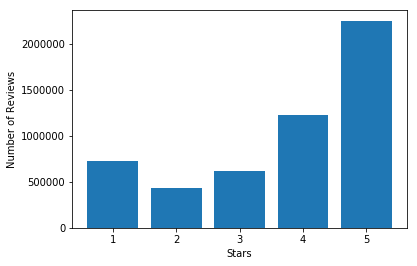

In [10]:
y = df_reviews.groupby('stars').size().tolist()
x = [1,2,3,4,5]
plt.bar(x,y)
plt.xlabel('Stars')
plt.ylabel('Number of Reviews')
plt.show()

In [11]:
df_business.groupby('stars').size()

stars
1.0     3788
1.5     4303
2.0     9320
2.5    16148
3.0    23142
3.5    32038
4.0    33492
4.5    24796
5.0    27540
dtype: int64

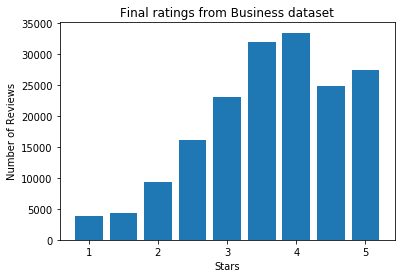

In [12]:
y = df_business.groupby('stars').size().tolist()
x = np.arange(1,5.5,0.5)
plt.bar(x,y,width=0.4)
plt.xlabel('Stars')
plt.ylabel('Number of Reviews')
plt.title('Final ratings from Business dataset')
plt.show()

In [13]:
df_reviews_vegas = df_reviews[df_reviews.business_id.isin(df_vegas['business_id'])]

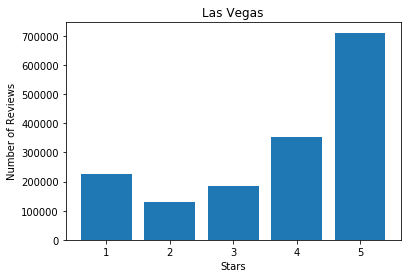

In [14]:
y = df_reviews_vegas.groupby('stars').size().tolist()
x = [1,2,3,4,5]
plt.bar(x,y)
plt.xlabel('Stars')
plt.ylabel('Number of Reviews')
plt.title('Las Vegas')
plt.show()

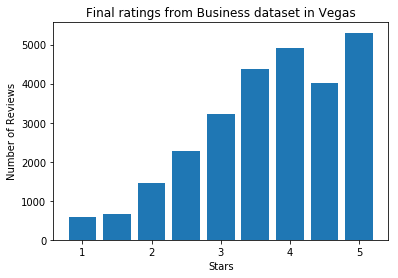

In [15]:
y = df_vegas.groupby('stars').size().tolist()
x = np.arange(1,5.5,0.5)
plt.bar(x,y,width=0.4)
plt.xlabel('Stars')
plt.ylabel('Number of Reviews')
plt.title('Final ratings from Business dataset in Vegas')
plt.show()

The distribution of the final ratings of a business and the distribution of the stars from review seem to vary a bit. The star distribution of the ratings from the reviews dataset seems heavily skewed towards the 5 star, but the final ratings of the buisness, although tail heavy, does not seem that skewed.

In [16]:
df_reviews_business = df_business[['business_id','state','city']].merge(df_reviews,how='left',on='business_id')
states_grouped = df_reviews_business.groupby('state').size()

In [17]:
states_grouped = states_grouped[states_grouped >= 1000]
states = states_grouped.axes[0].tolist()
states

[u'AZ',
 u'BW',
 u'EDH',
 u'HLD',
 u'IL',
 u'MLN',
 u'NC',
 u'NV',
 u'OH',
 u'ON',
 u'PA',
 u'QC',
 u'SC',
 u'WI']

In [18]:
df_interested_states_business = df_business[df_business.state.isin(states)]

In [19]:
df_interested_states_reviews = df_interested_states_business[['business_id','state','city']].merge(df_reviews,how='left',on='business_id')

In [20]:
state_stars_gobj = df_interested_states_reviews.groupby(['state','stars'])
state_stars_stat = state_stars_gobj.size()

In [21]:
states_dict = {st:i for i,st in enumerate(states)}
grid = np.zeros((len(states_dict),5))
for idx,cnt in state_stars_gobj.size().iteritems():
   grid[states_dict[idx[0]],int(idx[1]-1)] = cnt

In [22]:
grid_percent = (grid/grid.sum(axis=1,keepdims=True))

In [23]:
x,y = np.meshgrid(xrange(len(states_dict)),xrange(5))# plt.scatter(xrange(len(states_dict)),xrange(1,6)))

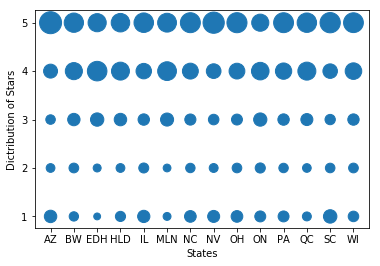

In [24]:
plt.scatter(x,y,s=grid_percent.T*1000)
plt.xticks(xrange(len(states)),states)
plt.yticks(xrange(5),xrange(1,6))
plt.xlabel('States')
plt.ylabel('Dictribution of Stars')
plt.show()

In [25]:
state_stars_gobj = df_interested_states_business.groupby(['state','stars'])
state_stars_stat = state_stars_gobj.size()

In [26]:
grid = np.zeros((len(states_dict),9))
star_dict={x:i for i,x in enumerate(np.arange(1,5.1,0.5))}
for idx,cnt in state_stars_gobj.size().iteritems():
   grid[states_dict[idx[0]],star_dict[idx[1]]] = cnt

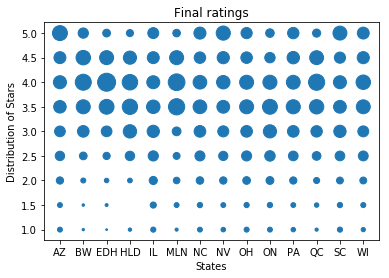

In [27]:
grid_percent = (grid/grid.sum(axis=1,keepdims=True))
x,y = np.meshgrid(xrange(len(states_dict)),xrange(9))# plt.scatter(xrange(len(states_dict)),xrange(1,6)))
plt.scatter(x,y,s=grid_percent.T*1000)
plt.xticks(xrange(len(states)),states)
plt.yticks(xrange(9),np.arange(1,5.1,0.5))
plt.xlabel('States')
plt.ylabel('Distribution of Stars')
plt.title('Final ratings')
plt.show()

### Distribution of Review Count

In [28]:
user_review_count = df_reviews.groupby('user_id').size()

In [29]:
user_review_count.sum()

5261667

In [30]:
df_user.head()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
0,4.67,0,0,0,0,0,0,0,0,1,...,0,[],0,"[cvVMmlU1ouS3I5fhutaryQ, nj6UZ8tdGo8YJ9lUMTVWN...",0,Johnny,8,0,oMy_rEb0UBEmMlu-zcxnoQ,2014-11-03
1,3.70,0,0,0,0,0,0,0,0,0,...,0,[],0,"[0njfJmB-7n84DlIgUByCNw, rFn3Xe3RqHxRSxWOU19Gp...",0,Chris,10,0,JJ-aSuM4pCFPdkfoZ34q0Q,2013-09-24
2,2.00,0,0,0,0,0,0,0,0,0,...,0,[],0,[],0,Tiffy,1,0,uUzsFQn_6cXDh6rPNGbIFA,2017-03-02
3,4.67,0,0,0,0,0,0,0,0,0,...,0,[],0,[],0,Mark,6,0,mBneaEEH5EMyxaVyqS-72A,2015-03-13
4,4.67,0,0,0,0,0,0,0,0,0,...,0,[],0,[],0,Evelyn,3,0,W5mJGs-dcDWRGEhAzUYtoA,2016-09-08


In [31]:
df_user['review_count'].sum()

30655691

In [32]:
print df_user.shape
print len(df_reviews.groupby('user_id'))

(1326101, 22)
1326101


1326101 users in the data set with 30655691  total reviews counts, out of which 5261669 are given in the dataset.

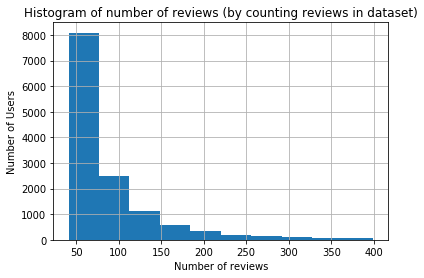

In [33]:
user_review_count[(user_review_count>40) & (user_review_count<400)].hist()
plt.xlabel('Number of reviews')
plt.ylabel('Number of Users')
plt.title('Histogram of number of reviews (by counting reviews in dataset)')

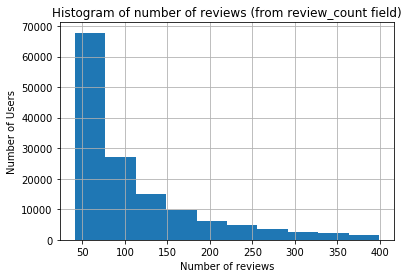

In [34]:
df_user[(df_user['review_count']<400) & (df_user['review_count']>40) ]['review_count'].hist()
plt.xlabel('Number of reviews')
plt.ylabel('Number of Users')
plt.title('Histogram of number of reviews (from review_count field)')

### Contradictory Reviews

In [35]:
business_5str = df_business[(df_business['stars']>4) & (df_business['review_count'] > 100)]

In [36]:
ids = list(business_5str['business_id'])
len(ids)

2099

In [37]:
df_rev_5strbus = df_reviews[df_reviews['business_id'].isin(ids)]

In [40]:
gobj = df_rev_5strbus.groupby(['business_id','stars'])
stat = gobj.sum()
stat.head(25)

useful  funny  cool
business_id            stars                     
-7PX_FOoCwktlunImRyZdg 1.0       0.0    6.0     0
                       2.0       8.0    3.0     1
                       3.0       9.0    3.0     1
                       4.0      38.0   15.0    33
                       5.0      47.0   11.0    25
-8ZiMXZReeTD3kwEvS0Lww 1.0       3.0    7.0     1
                       2.0       9.0   11.0     4
                       3.0       0.0    0.0     0
                       4.0      37.0    7.0    16
                       5.0     174.0   58.0    76
-9yq6bVqOn6Uywl9KhRToA 1.0       4.0    0.0     0
                       4.0       0.0    0.0     0
                       5.0      32.0    5.0     6
-AxKgZHxyV-oBBHNyOESAg 1.0       1.0    0.0     0
                       5.0      57.0    4.0    23
-Bdw-5H5C4AYSMGnAvmnzw 1.0      54.0   33.0    12
                       2.0      33.0   12.0    10
                       3.0     115.0   55.0    68
                       4.0     229.0   80.0   150
                       5.0     567.0  225.0   386
-C8sSrFqaCxp51pyo-fQLQ 1.0       1.0    0.0     0
                       2.0       4.0   10.0     3
                       3.0       8.0    3.0     5
                       4.0      76.0   37.0    61
                       5.0     127.0   63.0    97

In [41]:
df_1strRev_5strBus = df_reviews[(df_reviews['stars']==1)&(df_reviews['business_id'].isin(ids))]

In [42]:
df_2strRev_5strBus = df_reviews[(df_reviews['stars']==2)&(df_reviews['business_id'].isin(ids))]

In [43]:
df_3strRev_5strBus = df_reviews[(df_reviews['stars']==3)&(df_reviews['business_id'].isin(ids))]

In [44]:
df_4strRev_5strBus = df_reviews[(df_reviews['stars']==4)&(df_reviews['business_id'].isin(ids))]

In [45]:
df_5strRev_5strBus = df_reviews[(df_reviews['stars']==5)&(df_reviews['business_id'].isin(ids))]

In [46]:
business_1str = df_business[(df_business['stars']<3) & (df_business['review_count'] > 50)]

In [47]:
ids = list(business_1str['business_id'])
len(ids)

1708

In [48]:
df_rev_1strbus = df_reviews[df_reviews['business_id'].isin(ids)]

In [49]:
gobj = df_rev_1strbus.groupby(['business_id','stars'])
stat = gobj.sum()
stat.head(25)

useful  funny  cool
business_id            stars                     
-0WegMt6Cy966qlDKhu6jA 1.0      10.0    3.0     1
                       2.0       9.0    3.0     5
                       3.0      26.0   11.0    21
                       4.0       5.0    1.0     2
                       5.0       1.0    1.0     0
-2ToCaDFpTNmmg3QFzxcWg 1.0     357.0  144.0    75
                       2.0      68.0   45.0    25
                       3.0      39.0   20.0    16
                       4.0      55.0   33.0    37
                       5.0      19.0   14.0    15
-2qfXy3hcWG0GEcE8QUKQw 1.0     168.0   22.0    10
                       2.0      40.0    1.0     0
                       3.0       0.0    0.0     0
                       4.0       3.0    1.0     1
                       5.0      11.0    6.0     1
-5iyA2TptbQB9YmowvmVyQ 1.0     104.0    8.0    14
                       2.0       3.0    1.0     2
                       3.0       3.0    0.0     0
                       4.0      17.0   11.0    14
                       5.0       6.0    0.0     2
-9YyInW1wapzdNZrhQJ9dg 1.0      59.0   26.0    12
                       2.0      31.0   22.0    18
                       3.0      55.0   29.0    33
                       4.0      25.0   11.0     9
                       5.0       7.0    5.0     5

In [50]:
df_1strRev_1strBus = df_reviews[(df_reviews['stars']==1)&(df_reviews['business_id'].isin(ids))]

In [51]:
df_2strRev_1strBus = df_reviews[(df_reviews['stars']==2)&(df_reviews['business_id'].isin(ids))]

In [52]:
df_3strRev_1strBus = df_reviews[(df_reviews['stars']==3)&(df_reviews['business_id'].isin(ids))]

In [53]:
df_4strRev_1strBus = df_reviews[(df_reviews['stars']==4)&(df_reviews['business_id'].isin(ids))]

In [54]:
df_5strRev_1strBus = df_reviews[(df_reviews['stars']==5)&(df_reviews['business_id'].isin(ids))]

In [55]:
tot2 = df_1strRev_1strBus.shape[0]+df_2strRev_1strBus.shape[0]+df_3strRev_1strBus.shape[0]+df_4strRev_1strBus.shape[0]+df_5strRev_1strBus.shape[0]

In [56]:
tot1 =  df_1strRev_5strBus.shape[0] + df_2strRev_5strBus.shape[0] +df_3strRev_5strBus.shape[0]+df_4strRev_5strBus.shape[0]+df_5strRev_5strBus.shape[0]

In [57]:
grid = np.array([[df_1strRev_5strBus.shape[0] , df_2strRev_5strBus.shape[0] , df_3strRev_5strBus.shape[0],df_4strRev_5strBus.shape[0],df_5strRev_5strBus.shape[0]],[df_1strRev_1strBus.shape[0],df_2strRev_1strBus.shape[0],df_3strRev_1strBus.shape[0],df_4strRev_1strBus.shape[0],df_5strRev_1strBus.shape[0]]])
grid = grid/np.array([[float(tot1)],[float(tot2)]])

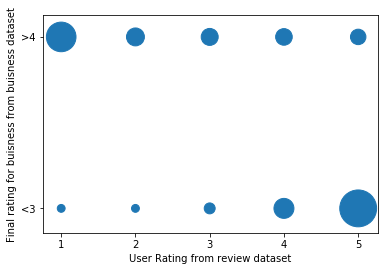

In [58]:
plt.scatter(np.array([[0,1,2,3,4],[0,1,2,3,4]]),np.array([[0,0,0,0,0],[1,1,1,1,1]]),s=grid*2000)
plt.yticks([0,1],['<3','>4'])
plt.xticks(range(5),range(1,6))
plt.xlabel('User Rating from review dataset')
plt.ylabel('Final rating for buisness from buisness dataset')
plt.show()

This plot shows the number of reviews across different star rating for buisness with >4 star final rating and <3 star final rating. 

The upper right and lower left bubble are the ones I'm interested in. These correspond to contradictory ratings by users. By contradictory, I mean that these reviews gave a significantly lower rating compred to the popular opinion which determined the final rating for the business. I would like to analyze these reviews to understand and get further insight.

In [59]:
from textblob import TextBlob
from wordcloud import WordCloud
import nltk

In [60]:
text = unicode(' '.join(df_1strRev_5strBus['text']),'utf-8')

In [61]:
allWords = nltk.tokenize.word_tokenize(text)
allWordDist = nltk.FreqDist(w.lower() for w in allWords)

stopwords = nltk.corpus.stopwords.words('english')
allWordExceptStopDist = nltk.FreqDist(w.lower() for w in allWords if w.lower() not in stopwords)    

In [62]:
mostCommon= allWordExceptStopDist.most_common(50)
print mostCommon

[(u'.', 139427), (u',', 67627), (u'!', 22240), (u"n't", 21404), (u"'s", 10384), (u'food', 10240), (u'would', 9645), (u'place', 9641), (u'...', 8649), (u'like', 8104), (u'back', 8066), (u'?', 7977), (u'time', 7822), (u'one', 7653), (u'get', 7457), (u'service', 7163), (u"''", 7001), (u'``', 6984), (u'us', 6925), (u')', 6829), (u'(', 6798), (u'good', 6365), (u'$', 6218), (u'said', 6150), (u'even', 5925), (u'go', 5867), (u'never', 5766), (u'could', 5623), (u'told', 5435), (u'got', 5209), (u'order', 4739), (u'asked', 4631), (u'came', 4451), (u'minutes', 4143), (u'went', 4128), (u'ordered', 4013), (u'first', 3957), (u'really', 3888), (u'people', 3807), (u"'m", 3756), (u'know', 3566), (u'restaurant', 3519), (u'bad', 3342), (u'experience', 3313), (u'going', 3286), (u'way', 3076), (u"'ve", 3066), (u'customer', 3056), (u'make', 3031), (u'come', 3014)]


In [63]:
wordcloud = WordCloud().generate(text)

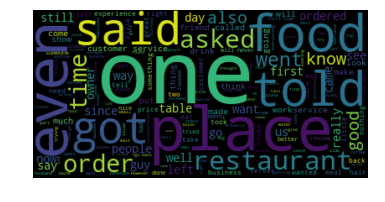

In [64]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Word cloud formed from 1 star reviews given to a buisness with final rating greater than 4 stars.

In [65]:
text = unicode(' '.join(df_2strRev_5strBus['text']),'utf-8')

In [66]:
stopwords = nltk.corpus.stopwords.words('english')
allWordExceptStopDist = nltk.FreqDist(w.lower() for w in allWords if w.lower() not in stopwords)    

In [67]:
print allWordExceptStopDist.most_common(50)

[(u'.', 139427), (u',', 67627), (u'!', 22240), (u"n't", 21404), (u"'s", 10384), (u'food', 10240), (u'would', 9645), (u'place', 9641), (u'...', 8649), (u'like', 8104), (u'back', 8066), (u'?', 7977), (u'time', 7822), (u'one', 7653), (u'get', 7457), (u'service', 7163), (u"''", 7001), (u'``', 6984), (u'us', 6925), (u')', 6829), (u'(', 6798), (u'good', 6365), (u'$', 6218), (u'said', 6150), (u'even', 5925), (u'go', 5867), (u'never', 5766), (u'could', 5623), (u'told', 5435), (u'got', 5209), (u'order', 4739), (u'asked', 4631), (u'came', 4451), (u'minutes', 4143), (u'went', 4128), (u'ordered', 4013), (u'first', 3957), (u'really', 3888), (u'people', 3807), (u"'m", 3756), (u'know', 3566), (u'restaurant', 3519), (u'bad', 3342), (u'experience', 3313), (u'going', 3286), (u'way', 3076), (u"'ve", 3066), (u'customer', 3056), (u'make', 3031), (u'come', 3014)]


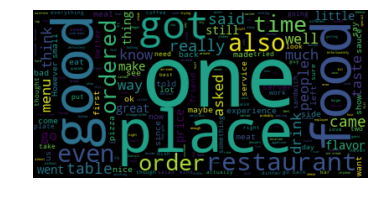

In [68]:
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Word cloud formed from 2 star reviews given to a buisness with final rating greater than 4 stars.

In [69]:
text = unicode(' '.join(df_4strRev_1strBus['text']),'utf-8')

In [70]:
stopwords = nltk.corpus.stopwords.words('english')
allWordExceptStopDist = nltk.FreqDist(w.lower() for w in allWords if w.lower() not in stopwords)    

In [71]:
print allWordExceptStopDist.most_common(50)

[(u'.', 139427), (u',', 67627), (u'!', 22240), (u"n't", 21404), (u"'s", 10384), (u'food', 10240), (u'would', 9645), (u'place', 9641), (u'...', 8649), (u'like', 8104), (u'back', 8066), (u'?', 7977), (u'time', 7822), (u'one', 7653), (u'get', 7457), (u'service', 7163), (u"''", 7001), (u'``', 6984), (u'us', 6925), (u')', 6829), (u'(', 6798), (u'good', 6365), (u'$', 6218), (u'said', 6150), (u'even', 5925), (u'go', 5867), (u'never', 5766), (u'could', 5623), (u'told', 5435), (u'got', 5209), (u'order', 4739), (u'asked', 4631), (u'came', 4451), (u'minutes', 4143), (u'went', 4128), (u'ordered', 4013), (u'first', 3957), (u'really', 3888), (u'people', 3807), (u"'m", 3756), (u'know', 3566), (u'restaurant', 3519), (u'bad', 3342), (u'experience', 3313), (u'going', 3286), (u'way', 3076), (u"'ve", 3066), (u'customer', 3056), (u'make', 3031), (u'come', 3014)]


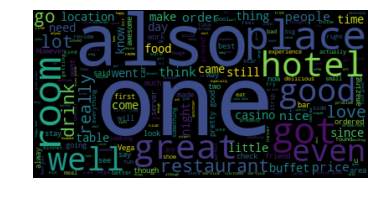

In [72]:
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Word cloud formed from 4 star reviews given to a buisness with final rating lesser than 3 stars.

In [73]:
text = unicode(' '.join(df_5strRev_1strBus['text']),'utf-8')

In [74]:
stopwords = nltk.corpus.stopwords.words('english')
allWordExceptStopDist = nltk.FreqDist(w.lower() for w in allWords if w.lower() not in stopwords)    

In [75]:
print allWordExceptStopDist.most_common(50)

[(u'.', 139427), (u',', 67627), (u'!', 22240), (u"n't", 21404), (u"'s", 10384), (u'food', 10240), (u'would', 9645), (u'place', 9641), (u'...', 8649), (u'like', 8104), (u'back', 8066), (u'?', 7977), (u'time', 7822), (u'one', 7653), (u'get', 7457), (u'service', 7163), (u"''", 7001), (u'``', 6984), (u'us', 6925), (u')', 6829), (u'(', 6798), (u'good', 6365), (u'$', 6218), (u'said', 6150), (u'even', 5925), (u'go', 5867), (u'never', 5766), (u'could', 5623), (u'told', 5435), (u'got', 5209), (u'order', 4739), (u'asked', 4631), (u'came', 4451), (u'minutes', 4143), (u'went', 4128), (u'ordered', 4013), (u'first', 3957), (u'really', 3888), (u'people', 3807), (u"'m", 3756), (u'know', 3566), (u'restaurant', 3519), (u'bad', 3342), (u'experience', 3313), (u'going', 3286), (u'way', 3076), (u"'ve", 3066), (u'customer', 3056), (u'make', 3031), (u'come', 3014)]


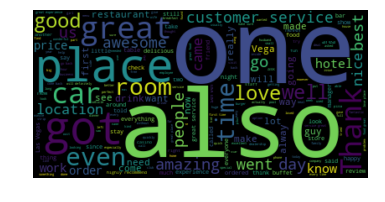

In [76]:
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Word cloud formed from 5 star reviews given to a buisness with final rating lesser than 3 stars.

The word clouds do not really make any sense to me. 
But I believe that would start making sense and give further insight when built from noun phrases as provided by the textblob package. 
The methods in textblob package were taking too long to run, so I skipped them for now.